In [1]:
from __future__ import division, print_function
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import os 
plt.rcParams['image.cmap'] = 'gist_earth'


In [2]:
os.chdir('..') # move to parent directory in order to load module
from tf_unet import image_gen
from tf_unet import unet
from tf_unet import util

c:\users\cy1015\appdata\local\programs\python\python36\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


(1, 8, 256, 256, 1)


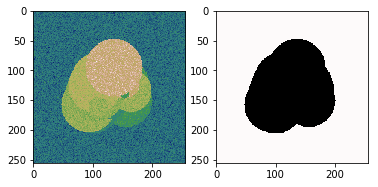

In [3]:
# generate sample image stack (1,8,256,256,1)<- NDHWC format
nx = 256
ny = 256
generator = image_gen.GrayScaleDataProvider(nx, ny, cnt=20, depth_3d=8) 
x_test, y_test = generator(1)
print(x_test.shape)
plt.subplot(121)
plt.imshow(x_test[0,0,...,0])
plt.subplot(122)
plt.imshow(y_test[0,0,...,0])

In [4]:
net = unet.Unet3D(channels=generator.channels, n_class=generator.n_class, layers=3, features_root=16)
trainer = unet.Trainer(net, optimizer="momentum", opt_kwargs=dict(momentum=0.2))
path = trainer.train(generator, "./unet_trained", training_iters=20, epochs=20, display_step=2)
prediction = net.predict("./unet_trained/model.cpkt", x_test)

2018-03-01 16:28:40,734 Layers 3, features 16, filter size 3x3, pool size: 2x2


Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See tf.nn.softmax_cross_entropy_with_logits_v2.



2018-03-01 16:28:42,187 From D:\PythonProject\tf_unet\tf_unet\unet.py:382: softmax_cross_entropy_with_logits (from tensorflow.python.ops.nn_ops) is deprecated and will be removed in a future version.
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See tf.nn.softmax_cross_entropy_with_logits_v2.



Instructions for updating:
keep_dims is deprecated, use keepdims instead


2018-03-01 16:28:42,773 From D:\PythonProject\tf_unet\tf_unet\layers.py:78: calling reduce_sum (from tensorflow.python.ops.math_ops) with keep_dims is deprecated and will be removed in a future version.
Instructions for updating:
keep_dims is deprecated, use keepdims instead
2018-03-01 16:28:43,615 Removing 'D:\PythonProject\tf_unet\prediction'
2018-03-01 16:28:43,617 Removing 'D:\PythonProject\tf_unet\unet_trained'
2018-03-01 16:28:43,618 Allocating 'D:\PythonProject\tf_unet\prediction'
2018-03-01 16:28:43,619 Allocating 'D:\PythonProject\tf_unet\unet_trained'
2018-03-01 16:28:47,750 Verification error= 23.8%, loss= 0.6870
2018-03-01 16:28:49,810 Start optimization
2018-03-01 16:28:54,807 Iter 0, Minibatch Loss= 0.6363, Training Accuracy= 0.7836, Minibatch error= 21.6%
2018-03-01 16:28:56,858 Iter 2, Minibatch Loss= 0.5426, Training Accuracy= 0.7774, Minibatch error= 22.3%
2018-03-01 16:28:58,907 Iter 4, Minibatch Loss= 0.5289, Training Accuracy= 0.7685, Minibatch error= 23.1%
2018-03

2018-03-01 16:31:08,716 Iter 126, Minibatch Loss= 0.1029, Training Accuracy= 0.9614, Minibatch error= 3.9%
2018-03-01 16:31:10,758 Iter 128, Minibatch Loss= 0.1000, Training Accuracy= 0.9617, Minibatch error= 3.8%
2018-03-01 16:31:12,791 Iter 130, Minibatch Loss= 0.0845, Training Accuracy= 0.9701, Minibatch error= 3.0%
2018-03-01 16:31:14,849 Iter 132, Minibatch Loss= 0.1333, Training Accuracy= 0.9536, Minibatch error= 4.6%
2018-03-01 16:31:16,907 Iter 134, Minibatch Loss= 0.2094, Training Accuracy= 0.9155, Minibatch error= 8.4%
2018-03-01 16:31:18,966 Iter 136, Minibatch Loss= 0.1254, Training Accuracy= 0.9514, Minibatch error= 4.9%
2018-03-01 16:31:21,008 Iter 138, Minibatch Loss= 0.1071, Training Accuracy= 0.9654, Minibatch error= 3.5%
2018-03-01 16:31:21,798 Epoch 6, Average loss: 0.1238, learning rate: 0.1470
2018-03-01 16:31:22,493 Verification error= 3.1%, loss= 0.0958
2018-03-01 16:31:23,791 Iter 140, Minibatch Loss= 0.0898, Training Accuracy= 0.9639, Minibatch error= 3.6%
2018

2018-03-01 16:33:35,539 Iter 262, Minibatch Loss= 0.0815, Training Accuracy= 0.9689, Minibatch error= 3.1%
2018-03-01 16:33:37,638 Iter 264, Minibatch Loss= 0.0706, Training Accuracy= 0.9717, Minibatch error= 2.8%
2018-03-01 16:33:39,706 Iter 266, Minibatch Loss= 0.0817, Training Accuracy= 0.9723, Minibatch error= 2.8%
2018-03-01 16:33:41,805 Iter 268, Minibatch Loss= 0.0837, Training Accuracy= 0.9710, Minibatch error= 2.9%
2018-03-01 16:33:43,922 Iter 270, Minibatch Loss= 0.0853, Training Accuracy= 0.9628, Minibatch error= 3.7%
2018-03-01 16:33:46,064 Iter 272, Minibatch Loss= 0.0766, Training Accuracy= 0.9674, Minibatch error= 3.3%
2018-03-01 16:33:48,255 Iter 274, Minibatch Loss= 0.0560, Training Accuracy= 0.9838, Minibatch error= 1.6%
2018-03-01 16:33:50,329 Iter 276, Minibatch Loss= 0.0639, Training Accuracy= 0.9741, Minibatch error= 2.6%
2018-03-01 16:33:52,500 Iter 278, Minibatch Loss= 0.0540, Training Accuracy= 0.9797, Minibatch error= 2.0%
2018-03-01 16:33:53,303 Epoch 13, Ave

2018-03-01 16:36:05,910 Epoch 19, Average loss: 0.0768, learning rate: 0.0755
2018-03-01 16:36:06,602 Verification error= 2.2%, loss= 0.0622
2018-03-01 16:36:08,775 Optimization Finished!


INFO:tensorflow:Restoring parameters from ./unet_trained/model.cpkt


2018-03-01 16:36:09,589 Restoring parameters from ./unet_trained/model.cpkt
2018-03-01 16:36:09,824 Model restored from file: ./unet_trained/model.cpkt


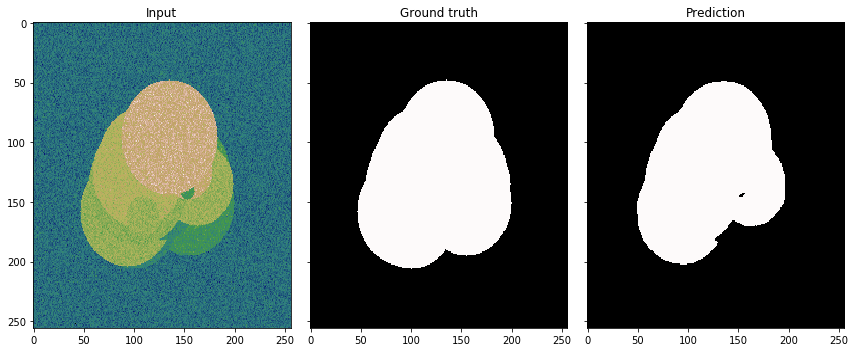

In [5]:
fig, ax = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(12,5))
ax[0].imshow(x_test[0,0,...,0], aspect="auto")
ax[1].imshow(y_test[0,0,...,1], aspect="auto")
mask = prediction[0,0,...,1] > 0.9
ax[2].imshow(mask, aspect="auto")
ax[0].set_title("Input")
ax[1].set_title("Ground truth")
ax[2].set_title("Prediction")
fig.tight_layout()
fig.savefig("docs/toy_problem.png")